# A chained LLM app
Here we are attempting to generate a blog using LangGraph. The LLM will first be prompted to generate an outline. The LLM will then elaborate upon the outline to give us a finished blog.

### 1. Import dependencies

In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_ollama.chat_models import ChatOllama
from typing import TypedDict

In [2]:
# For graphical visualization of the state graph
 
import nest_asyncio
nest_asyncio.apply()
from langchain_core.runnables.graph import MermaidDrawMethod
from IPython.display import Image

### 2. Linking the model

In [3]:
model = ChatOllama(model="gemma:2b")

### 3. Create a state

In [4]:
class BlogState(TypedDict):                      # The BlogState inherits a TypedDict
    topic: str
    outline: str
    blog: str

### 4. Define the function for the graph node

In [ ]:
def llm_outline(state: BlogState) -> BlogState:
    # Extract the question from the state
    topic = state["topic"]


    # Form a prompt
    prompt = f"I require an outline for a blog on {topic}."


    # Ask the question to the model
    outline = model.invoke(prompt).content


    # Update the state with the answer
    state['outline'] = outline

    return state


def llm_blog(state: BlogState) -> BlogState:
    # Extract the outline from the state
    outline = state["outline"]


    # Form a prompt
    prompt = f"Write a detailed blog based on the following outline:\n{outline}"


    # Ask the question to the model
    blog = model.invoke(prompt).content


    # Update the state with the answer
    state["blog"] = blog

    return state

### 5. Create the graph

In [6]:
# Declare the graph:
graph = StateGraph(BlogState)                    # The StateGraph takes the state as a parameter, signifying that the "state" will be exchanged between the nodes through the edges.

# Add a nodes/states to the graph:
graph.add_node("llm_outline", llm_outline)
graph.add_node("llm_blog", llm_blog)


# Add edges to the graph:
graph.add_edge(START, 'llm_outline')
graph.add_edge('llm_outline', 'llm_blog')
graph.add_edge('llm_blog', END)

### 6. Compile the graph

In [7]:
workflow = graph.compile()

### 7. Run the code

In [8]:
initial_state = { "topic" : "Motorcycles" }

final_state = workflow.invoke(initial_state)

print(final_state)


{'topic': 'Motorcycles', 'outline': '## Motorcycle Blog Outline\n\n**I. Introduction**\n    a. History of motorcycles\n    b. Different types of motorcycles\n    c. The allure of motorcycles\n\n**II. Motorcycle Maintenance and Care**\n    a. Essential maintenance tasks\n    b. How to read a motorcycle manual\n    c. Basic repair skills for beginners\n    d. Choosing the right tires\n\n**III. Riding and Riding Techniques**\n    a. Basic riding skills\n    b. Highway riding and long-distance riding\n    c. Motorcycle safety and awareness\n    d. Advanced riding techniques\n\n**IV. Motorcycle Reviews and Comparisons**\n    a. Comparing new and used motorcycles\n    b. In-depth reviews of specific models\n    c. Features and technology advancements\n\n**V. Motorcycle Culture and Lifestyle**\n    a. Motorcycle clubs and communities\n    b. Riding and racing events\n    c. Motorcycle customization and modification\n    d. The history of motorcycles in different cultures\n\n**VI. Motorcycle H

In [9]:
print(final_state["outline"])

## Motorcycle Blog Outline

**I. Introduction**
    a. History of motorcycles
    b. Different types of motorcycles
    c. The allure of motorcycles

**II. Motorcycle Maintenance and Care**
    a. Essential maintenance tasks
    b. How to read a motorcycle manual
    c. Basic repair skills for beginners
    d. Choosing the right tires

**III. Riding and Riding Techniques**
    a. Basic riding skills
    b. Highway riding and long-distance riding
    c. Motorcycle safety and awareness
    d. Advanced riding techniques

**IV. Motorcycle Reviews and Comparisons**
    a. Comparing new and used motorcycles
    b. In-depth reviews of specific models
    c. Features and technology advancements

**V. Motorcycle Culture and Lifestyle**
    a. Motorcycle clubs and communities
    b. Riding and racing events
    c. Motorcycle customization and modification
    d. The history of motorcycles in different cultures

**VI. Motorcycle History and Milestones**
    a. Birth of the motorcycle
    b. Major

In [10]:
print(final_state["blog"])

**Motorcycle Blog: A Comprehensive Guide for New and Experienced Riders**

**I. Introduction**

**a. History of Motorcycles:**
- The invention of the motorcycle, from its humble beginnings to its modern-day sophistication.
- A brief overview of significant milestones in motorcycle history, from the first steam-powered machines to the modern-day superbike.

**b. Different Types of Motorcycles:**
- Categorizing motorcycles based on size, power, and purpose.
- Describing the differences between cruisers, sport bikes, naked bikes, and touring motorcycles.

**c. The Lure of Motorcycles:**
- Exploring the allure of motorcycles for both practical and aesthetic reasons.
- Discussing the sense of freedom, adventure, and individuality that motorcycles offer.

**II. Motorcycle Maintenance and Care**

**a. Essential Maintenance Tasks:**
- Regular cleaning and maintenance, including oil changes, tire rotations, and inspection of lights, brakes, and fluids.
- Importance of using the appropriate tool

### 8. The Graph

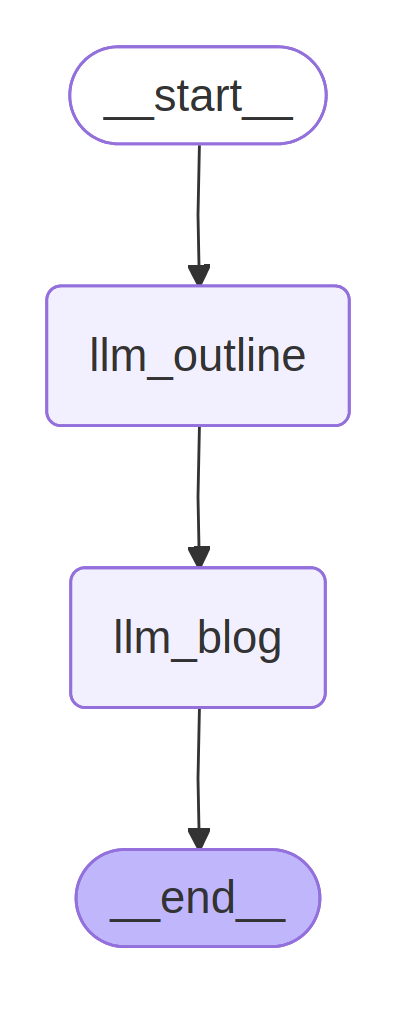

In [11]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png(draw_method=MermaidDrawMethod.PYPPETEER))